# Model Interpretability

Name: Vaishnavi Bhoite
Nuid: 002776319

# Abstract
The objective was to build a classifier model, a regression model, and a model using H20 AutoML to find the optimal model for the selected dataset. These models should all undergo SHAP Analysis after being built. This produces SHAP values that are then contrasted to those from other model interpretability models. It is generally believed that it’s impossible to precisely predict the potability of water as it depends on various factors. Potability is the dependent variable in this dataset, while the others are independent factors. Selecting the key variables that influence water potability should come first. Then, using linear regression and random forest, a water potability prediction model is  created.(classifier tree based model). The water potability dataset is used to create a linear model, and the regression results are then analyzed. Each input feature's impact on the outcome is shown by the coefficients. For instance, a positive coefficient for "ph" means that the likelihood of potable water is increased as pH values rise. a tree-based model is created, and the nodes are then analyzed. A decision based on input characteristics is represented by each node in the tree. If a node splits on "total hardness" with a cutoff of 225.1, for instance, it means that water with a total hardness below this level is probably potable. Understanding the reasoning behind the decision-making process in the model is made easier through the interpretation of nodes. The water potability dataset is used to create models using auto-ML, and the best model is chosen based on performance metrics. Model selection is automated by auto-ML, which can save time and effort. It is still possible to interpret the best model using techniques like SHAP analysis.To evaluate the models, that needs to be done with the water potbility dataset. The results of the data analysis and testing indicate that, while the algorithm can still be improved using more sophisticated machine learning techniques, the linear regression model and random forest classifier can predict and analyze the water potability to some extent

## Dataset
This dataset has a water_potability.csv file which contains water quality metrics for 3276 different water bodies.

Content:


1.   ph Value: When assessing the acid-base equilibrium of water, PH is a key factor. Additionally, it shows whether the water is acidic or neutral. The highest pH allowed range, according to WHO, is between 6.5 and 8.5. The present investigation's ranges fell between 6.52 and 6.83, which is within WHO standards.

2.   Hardness: Salts made of calcium and magnesium are the primary culprits in hardness. These salts are released from the geologic layers that water passes through. How long water is exposed to a hardness-producing substance influences how hard the water is when it is in its natural state. The ability of water to form soap due to calcium and magnesium precipitation was the initial definition of hardness.


3.   Solids(Total dissolved solids -TDS):Numerous inorganic and some organic elements or salts, including potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates, and others, can be dissolved by water. These minerals gave the water an undesirable flavor and diluted hue. This is a crucial variable when using water. Water with a high TDS rating is one that has a high mineral content. The recommended TDS limit for drinking purposes is 500 mg/l, with a highest limit of 1000 mg/l.

4.   Chloramines:The two main disinfectants used in public water networks are chlorine and chloramine. When ammonia is added to chlorine to treat drinking water, chloramines are most frequently produced. Drinking water can contain up to 4 mg/L of chlorine (or 4 ppm), which is regarded as a safe amount.

5.   Sulfate:Sulfates are organic compounds that are typically present in rocks, soil, and minerals. They can be found in the surrounding environment, groundwater, vegetation, and food. Sulfate is primarily used in the chemical business for commercial purposes. The amount of sulfate in saltwater is approximately 2,700 mg/L. The majority of freshwater supplies have concentrations between 3 and 30 mg/L, but some regions have much greater levels (1000 mg/L).
6.   Conductivity: Pure water is an excellent insulator rather than a good conductor of electrical current. The electrical conductivity of water is improved by an increase in ion content. The electrical conductivity of water is typically determined by the quantity of dissolved solids present. The ability of a solution to transmit electricity through its ionic process is measured by electrical conductivity (EC). According to WHO guidelines, the EC number shouldn't be higher than 400 S/cm.


7.   Organic carbon :The decaying natural organic matter (NOM) and synthetic sources both contribute to the total organic carbon (TOC) in source waterways. The total quantity of carbon (TOC) in organic compounds in pure water is a measurement of this. US EPA estimates that treated potable water contains 2 mg/L of TOC and that source water, which is used for treatment, contains 4 mg/Lit.


8.   Trihalomethanes:Chemicals called THMs can be detected in chlorine-treated water. The amount of organic matter in the water, the quantity of chlorine needed to clean the water, and the temperature of the treated water all affect the concentration of THMs in drinking water. THM concentrations up to 80 ppm are regarded as harmless for drinking water.


9.   Turbidity: The amount of solid matter existing in the suspended state determines how turbid the water is. The test is used to determine the purity of waste discharge with regard to colloidal matter and measures the light-emitting properties of water. The Wondo Genet Campus's mean turbidity value (0.98 NTU) is less than the WHO-recommended value of 5.00 NTU.
10.   Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [1]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=d603e222d0969e51d565b3b2fb50a20991f095de4de8ad04b863a1afb9169bfd
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


# Installing and Importing required libraries

In [2]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Reading and Analyzing Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Vaishnavi200029/Water_Potability/main/water_potability.csv")

In [4]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
data.shape

(3276, 10)

In [6]:
#taking the basic information of all the columns in the given dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
data.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

<Axes: >

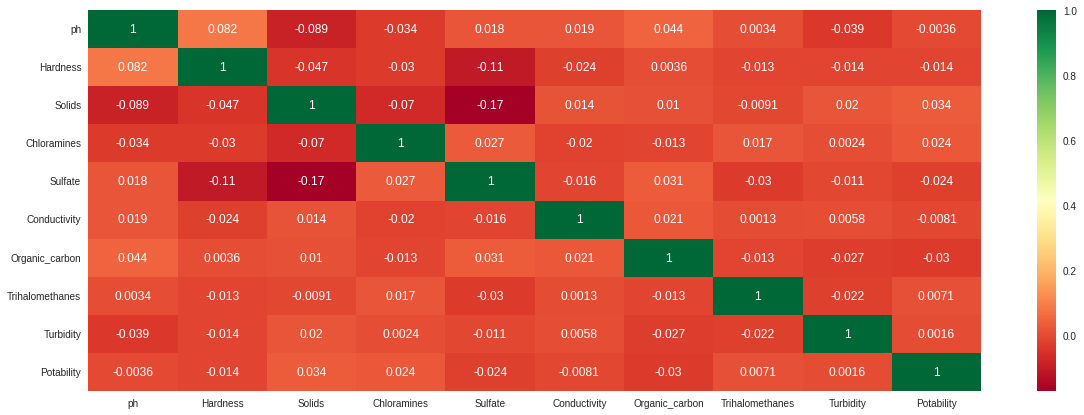

In [9]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

# Performing Linear Regression

In [9]:
#taking the basic information of all the columns in the given dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
data.isna().head()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0   True     False   False        False    False         False   
1  False     False   False        False     True         False   
2  False     False   False        False     True         False   
3  False     False   False        False    False         False   
4  False     False   False        False    False         False   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0           False            False      False       False  
1           False            False      False       False  
2           False            False      False       False  
3           False            False      False       False  
4           False            False      False       False

In [11]:
nanValues = data.isna()
nanColumns = nanValues.any()
columnsWithNan = data.columns[nanColumns].tolist()
print(columnsWithNan)

['ph', 'Sulfate', 'Trihalomethanes']


In [12]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
from pandas.core.series import FillnaOptions
FillnaOptions = data.fillna(0)

In [14]:
data1 = data.fillna(0)

In [15]:
data.fillna(0,inplace=True)

In [16]:
data1 = data.replace(np.nan, 0)

In [17]:
data1.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  0.000000  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246    0.000000    592.885359   
2  8.099124  224.236259  19909.541732     9.275884    0.000000    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [18]:
df = data[['ph', 'Hardness', 'Solids', 'Chloramines',
       'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']].dropna() #subset the dataframe

In [19]:
from statsmodels.stats import outliers_influence

In [20]:
X = data1[['ph', 'Hardness', 'Solids', 'Chloramines',
       'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [outliers_influence.variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature        VIF
0               ph   5.168021
1         Hardness  27.254639
2           Solids   6.934263
3      Chloramines  18.023772
4          Sulfate   3.911018
5     Conductivity  23.841821
6   Organic_carbon  17.472994
7  Trihalomethanes   9.185051
8        Turbidity  22.236791


In [21]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data1['Potability'], data1[['ph', 'Hardness', 'Solids', 'Chloramines',
       'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Potability   R-squared (uncentered):                   0.391
Model:                            OLS   Adj. R-squared (uncentered):              0.389
Method:                 Least Squares   F-statistic:                              232.8
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                        0.00
Time:                        02:06:10   Log-Likelihood:                         -2294.9
No. Observations:                3276   AIC:                                      4608.
Df Residuals:                    3267   BIC:                                      4663.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ph                  0.0053      0.003      1.841      0.066      -0.000       0.011
Hardness            0.0002      0.000      1.117      0.264      -0.000       0.001
Solids           2.859e-06   9.48e-07      3.016      0.003       1e-06    4.72e-06
Chloramines         0.0146      0.005      2.950      0.003       0.005       0.024
Sulfate            7.4e-05   5.75e-05      1.288      0.198   -3.87e-05       0.000
Conductivity     8.857e-05    9.6e-05      0.923      0.356   -9.97e-05       0.000
Organic_carbon     -0.0018      0.002     -0.726      0.468      -0.007       0.003
Trihalomethanes     0.0008      0.000      2.034      0.042    2.84e-05       0.002
Turbidity           0.0147      0.010      1.482      0.139      -0.005       0.034
==============================================================================
Omnibus:                    13725.508   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              535.153
Skew:                           0.447   Prob(JB):                    6.21e-117
Kurtosis:                       1.233   Cond. No.                     2.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Variable Correlation')

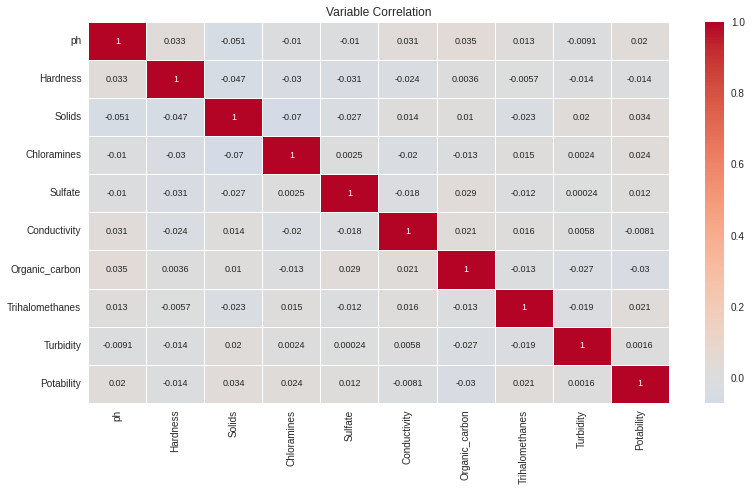

In [23]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(13,7))

sns.heatmap(data1.corr(),center=0, linewidths=0.9,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# Performing Linear Regression

In [22]:
#Computing Linear Regression model for Water Potability dataset
def linear_reg(X_train,y_train,X_test,y_test):
    linear_reg = LinearRegression()
    linear_reg_model = linear_reg.fit(X_train,y_train)
    print('Train set')
    pred=linear_reg_model.predict(X_train)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_train,pred)))
    print('Test set')
    pred=linear_reg_model.predict(X_test)
    model_lr=linear_reg_model.predict(X_test)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_test,pred))) 

In [23]:
from sklearn.model_selection import  train_test_split

X = data1[ ['ph', 'Hardness', 'Solids', 'Chloramines',
       'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

y = data1['Potability']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [24]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
cols1= ['ph', 'Hardness', 'Solids', 'Chloramines',
       'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [26]:
#Computing R2 for testing and training data
linear_reg(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
Linear Regression Mean Squared error :0.2354938372616404
Linear Regression r2_score :0.004470786744829258
Test set
Linear Regression Mean Squared error :0.24785036376330694
Linear Regression r2_score :-0.011291900296265034


# SHAP Analysis on Linear Regression model

The SHAP values for each feature show how the expected model prediction changes when that characteristic is taken into consideration. The SHAP value for each feature describes how that feature contributes to explaining the discrepancy between the average model prediction and the instance's actual prediction.The core of the Shapley value is to measure each coalition member's individual input to the final result while maintaining that the sum of those contributions equals the result.The input feature addition to each prediction can be measured using SHAP values in model explanation.

In [31]:
%%capture
!pip install shap
import shap 

In [32]:
import shap
shap.initjs()

In [33]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.sample(frac=0.01,random_state=200)
#LinearExplainer is used as linear regression model is used
explainer = shap.LinearExplainer(model, X, feature_perturbation="interventional") 
shap_values = explainer.shap_values(X) #Saving SHAP values

In [34]:
#Initialize java script
shap.initjs()

 #Explain one row in the data with the
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [35]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)  

In [36]:
#Initializing explainer from shap, lm is our trained model
explainer_shap=shap.LinearExplainer(model=model, masker=X_train)

#Computing shap values for train dataset
shap_values = explainer_shap.shap_values(X_train)

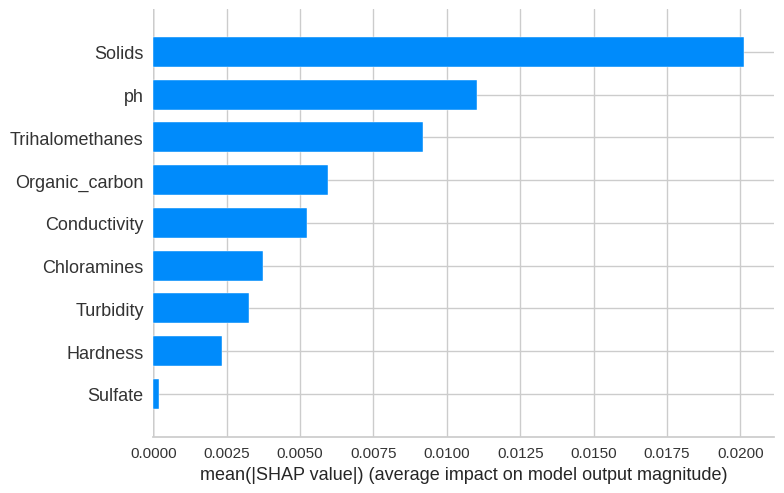

In [37]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [38]:
shap.dependence_plot("Solids", shap_values, X_train)

In [39]:
from sklearn.linear_model import LinearRegression
import shap

# train Linear model
#Seperating the dependent and independent variable from the main dataset
X=data.drop(['Potability'],axis=1)
y=data['Potability']
regressor = LinearRegression()
linear_reg = regressor.fit(X, y)

# compute SHAP values
explainer = shap.Explainer(linear_reg, X)
shap_values = explainer(X)

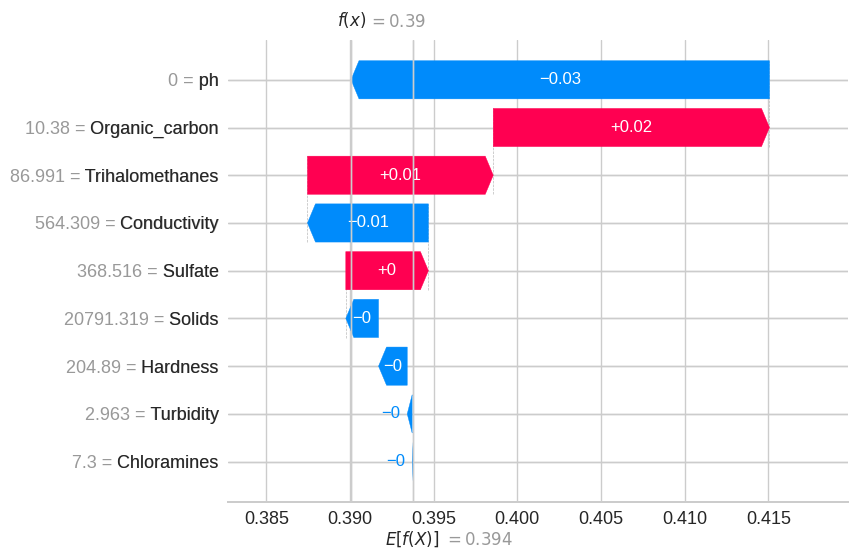

In [40]:
shap.plots.waterfall(shap_values[0])

For the linear regression model from the plots it can be interpreted that ph, organic carbon and trihalomethanes are the important features for this regressor model. These are the major features in determining the Potability of the water.

# Performing Random Forest 


In [41]:
def ramdomforest(X_train,y_train,X_test,y_test):
    rf = RandomForestRegressor()
    rf_model = rf.fit(X_train,y_train)
    print('Train set')
    pred=rf_model.predict(X_train)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_train,pred)))
    print('Tesst set')
    pred=rf_model.predict(X_test)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_test,pred)))

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train) 

RandomForestRegressor()

In [42]:
ramdomforest(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
ramdomforest Mean Squared error :0.030698762475049896
ramdomforest r2_score :0.8702237170616951
Tesst set
ramdomforest Mean Squared error :0.20998475609756098
ramdomforest r2_score :0.14320931467364495


# SHAP Analysis on Random Forest Model

In [43]:
%%capture
!pip install shap
import shap 

In [44]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.head(10)
 # Using Tree explainer as this is tree based classifier model
explainer = shap.TreeExplainer(random_forest)
#Saving shap values
shap_values = explainer.shap_values(X) 

In [45]:
shap.initjs() #Initialize java script
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:]) #Explain one row in the data with the model

In [46]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X) 

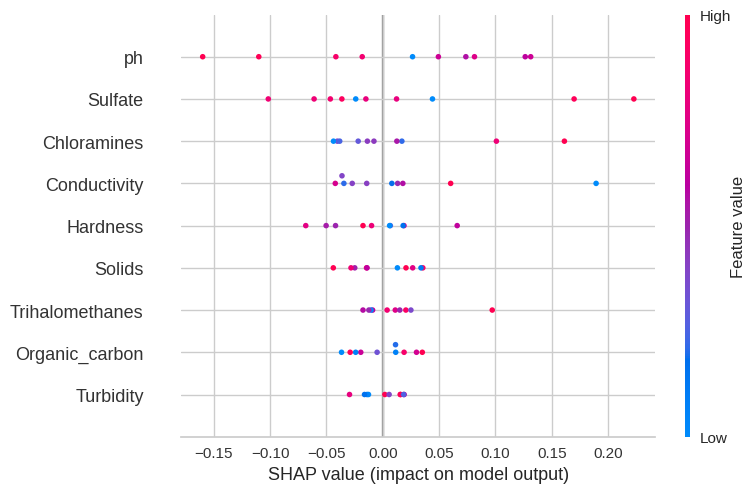

In [47]:
shap.initjs()
shap.summary_plot(shap_values, X) 

In [48]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
iris = load_iris()

model_rf1 = RandomForestRegressor(n_estimators=10)
# Train
model_rf1.fit(iris.data, iris.target)
# Extract single tree
estimator = model_rf1.estimators_[5]

In [50]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in colab notebook
from IPython.display import Image
Image(filename = 'tree.png')

For the random forest model according to SHAP Analysis the important features to determine the target variable 'Potability' are ph, sulfate and chloramines. ph is the common feature which is important for both Random Forest and Linear Regression Model. ph has the highest value of feature importance and is placed first on the scale.

# Using AutoML to identify best model

In [51]:
#importing all the necessary libraries

import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
import scipy

In [52]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [53]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [54]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:40198..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpd7fjdtnf
  JVM stdout: /tmp/tmpd7fjdtnf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpd7fjdtnf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:40198
Connecting to H2O server at http://127.0.0.1:40198 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_7kk4hm
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:40198
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

In [55]:
# Create a 80/20 train/test split
url = "https://raw.githubusercontent.com/Vaishnavi200029/Water_Potability/main/water_potability.csv"
df = h2o.import_file(path = url)
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [56]:
# Set the features and target
X=df.columns
print(X)

y ='Potability'
X.remove(y) 
print(X)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [57]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
# Passing the training and testing dataset through H20 AutomML
aml.train(x=X,y=y,training_frame=df_train) 

AutoML progress: |
02:12:28.861: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
02:12:35.72: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
02:12:36.488: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
02:12:42.292: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
02:12:42.824: _response param, We have detec

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_3_AutoML_1_20230330_21228


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       0/1
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.08588719027312429
RMSE: 0.2930651638682501
MAE: 0.26149583038348784
RMSLE: 0.20888092807280031
Mean Residual Deviance: 0.08588719027312429
R^2: 0.6385973918225383
Null degrees of freedom: 2622
Residual degrees of freedom: 2618
Null deviance: 623.3549370949265
Residual deviance: 225.28210008640502
AIC: 1017.0194511979746

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.20689823992080872
RMSE: 0.4548606818805168
MAE: 0.41368426482958964
RMSLE: 0.31992428075922746
Mean Residual Deviance: 0.20689823992080872
R^2: 0.1293979544921201
Null degrees of freedom: 2622
Residual degrees of freedom: 2618
Null deviance: 624.6186685690141
Residual deviance: 542.6940833122812
AIC: 3323.141073511088

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.41373   0.009338    0.417798      0.403238      0.419831      0.404277      0.423507
mean_residual_deviance  0.206961  0.0105788   0.2072        0.198806      0.215389      0.194257      0.219153
mse                     0.206961  0.0105788   0.2072        0.198806      0.215389      0.194257      0.219153
null_deviance           124.924   2.48042     122.967       124.021       127.267       122.504       127.86
r2                      0.126385  0.031269    0.0946366     0.148723      0.111544      0.16925       0.107772
residual_deviance       108.539   4.88908     110.437       105.367       112.649       101.596       112.645
rmse                    0.454811  0.0116373   0.455192      0.445877      0.464101      0.440745      0.468138
rmsle                   0.319892  0.00545459  0.324396      0.315263      0.324198      0.312801      0.322803

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [58]:
print(aml.leaderboard)

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_3_AutoML_1_20230330_21228  0.454861  0.206898  0.413684  0.319924                  0.206898
StackedEnsemble_AllModels_2_AutoML_1_20230330_21228     0.4549    0.206934  0.413328  0.319894                  0.206934
StackedEnsemble_BestOfFamily_4_AutoML_1_20230330_21228  0.455343  0.207338  0.413977  0.320201                  0.207338
StackedEnsemble_AllModels_3_AutoML_1_20230330_21228     0.456481  0.208375  0.41383   0.321025                  0.208375
StackedEnsemble_AllModels_1_AutoML_1_20230330_21228     0.457444  0.209255  0.41811   0.321614                  0.209255
StackedEnsemble_BestOfFamily_2_AutoML_1_20230330_21228  0.458164  0.209915  0.419241  0.322214                  0.209915
GBM_4_AutoML_1_20230330_21228                           0.461146  0.212656  0.424698  0.324468                  0.212656
GBM_grid_1_AutoML_1_20230330_212

In [59]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_BestOfFamily_3_AutoML_1_20230330_21228': 0,
 'StackedEnsemble_AllModels_2_AutoML_1_20230330_21228': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230330_21228': 2,
 'StackedEnsemble_AllModels_3_AutoML_1_20230330_21228': 3,
 'StackedEnsemble_AllModels_1_AutoML_1_20230330_21228': 4,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20230330_21228': 5,
 'GBM_4_AutoML_1_20230330_21228': 6,
 'GLM_1_AutoML_1_20230330_21228': 59}

In [60]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

6


In [61]:
#Printing the best model
print("The best model is - " , best_model.algo)

The best model is -  gbm


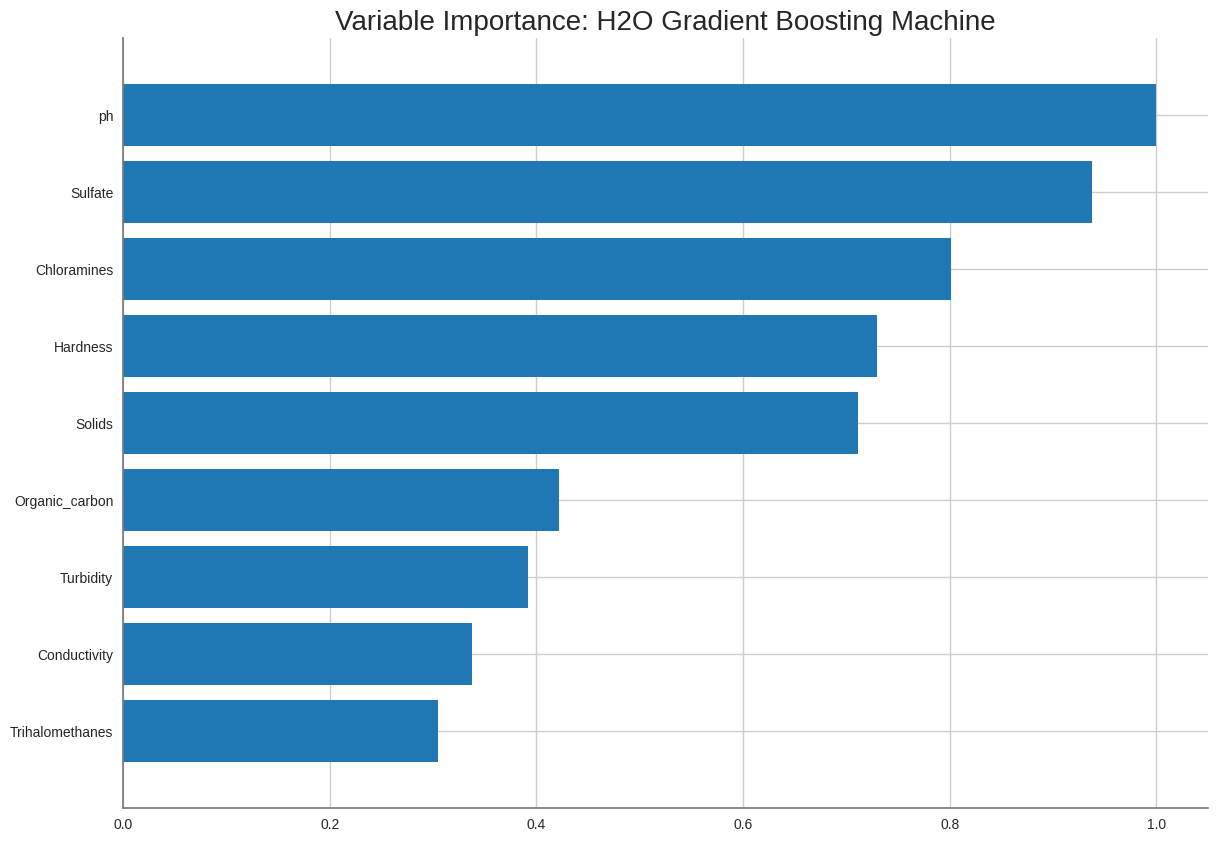

<Figure size 800x550 with 0 Axes>

In [62]:
#plot variables in order of their importance for price prediction
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

59
glm


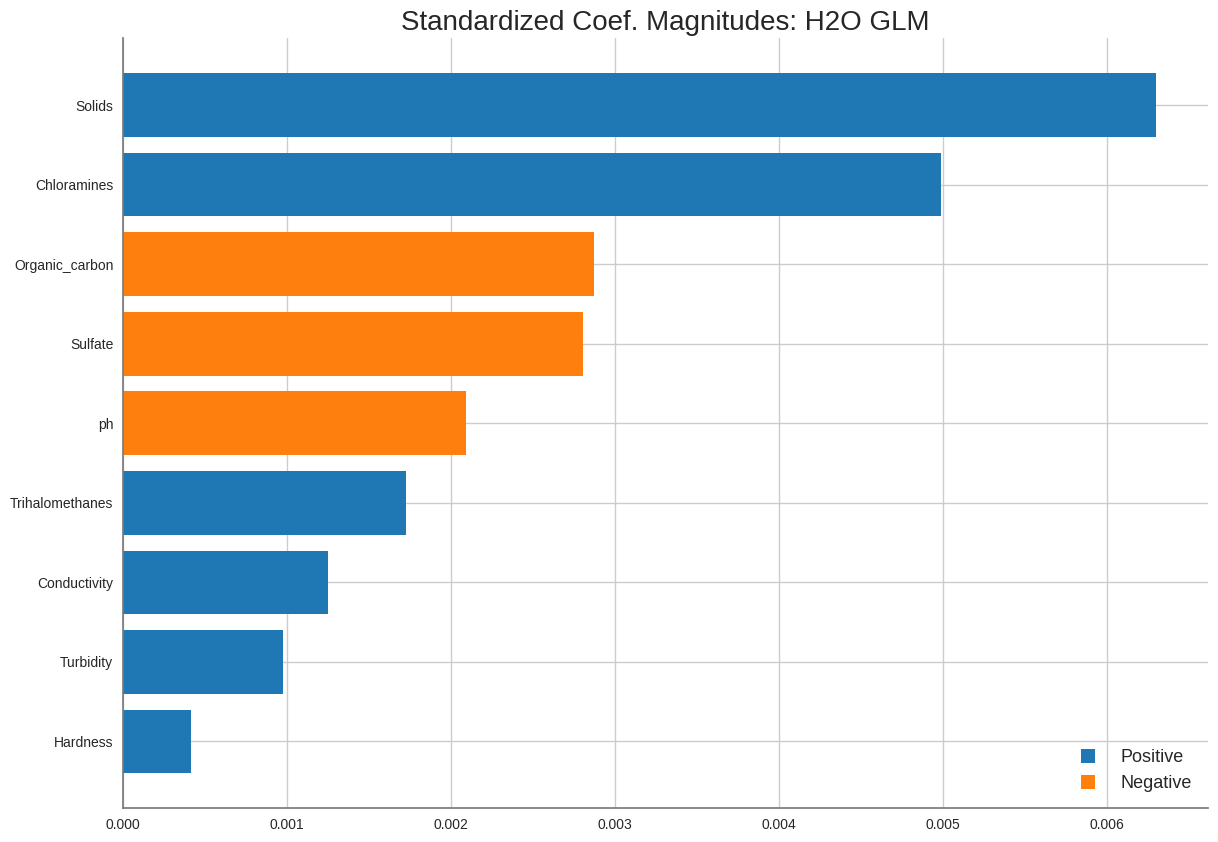

In [63]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

# SHAP Analysis on AutoML Model


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_3_AutoML_1_20230330_21228     0.463488  0.214821  0.422117  0.326186                  0.214821                1032                   0.272438  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230330_21228  0.46377   0.215082  0.42453   0.327099                  0.215082                 386                   0.075256  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20230330_21228  0.464365  0.215635  0.424732  0.327346                  0.215635                 327                   0.101804  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230330_21228     0.464756  0.215998  0.425506  0.327574                  0.215998                 500                   0.083092  StackedEnsemble
XRT_1_AutoML_1_20230330_21228                           0.467634  0.218682  0.431041  0.329999                  0.218682                1282                   0.030109  DRF
GBM_grid_1_AutoML_1_20230330_21228_model_12             0.467814  0.21885   0.43278   0.328311                  0.21885                  286                   0.013434  GBM
DeepLearning_1_AutoML_1_20230330_21228                  0.468507  0.219499  0.431332  0.33029                   0.219499                 290                   0.004204  DeepLearning
GBM_grid_1_AutoML_1_20230330_21228_model_25             0.46952   0.220449  0.434279  0.329558                  0.220449                 526                   0.013796  GBM
DeepLearning_grid_1_AutoML_1_20230330_21228_model_2     0.469735  0.220651  0.430225  0.32515                   0.220651                 156                   0.00428   DeepLearning
StackedEnsemble_AllModels_1_AutoML_1_20230330_21228     0.469905  0.220811  0.429453  0.32989                   0.220811                 393                   0.0802    StackedEnsemble
GBM_5_AutoML_1_20230330_21228                           0.470034  0.220932  0.44337   0.329877                  0.220932                 233                   0.010675  GBM
GBM_grid_1_AutoML_1_20230330_21228_model_26             0.470054  0.22095   0.43242   0.329979                  0.22095                  398                   0.018955  GBM
StackedEnsemble_BestOfFamily_2_AutoML_1_20230330_21228  0.470125  0.221018  0.429527  0.330176                  0.221018                 337                   0.061483  StackedEnsemble
DeepLearning_grid_1_AutoML_1_20230330_21228_model_1     0.470347  0.221226  0.433246  0.33385                   0.221226                3562                   0.006216  DeepLearning
GBM_grid_1_AutoML_1_20230330_21228_model_2              0.470944  0.221788  0.445456  0.330724                  0.221788                 188                   0.010063  GBM
GBM_grid_1_AutoML_1_20230330_21228_model_23             0.471164  0.221996  0.426202  0.330504                  0.221996                 735                   0.023894  GBM
XGBoost_grid_1_AutoML_1_20230330_21228_model_23         0.471188  0.222018  0.43348   0.330758                  0.222018                 118                   0.002522  XGBoost
GBM_4_AutoML_1_20230330_21228                           0.471414  0.222232  0.432193  0.330717                  0.222232                 484                   0.014952  GBM
GBM_grid_1_AutoML_1_20230330_21228_model_5              0.47188   0.22267   0.424624  0.330823                  0.22267                  434                   0.017328  GBM
GBM_2_AutoML_1_20230330_21228                           0.472603  0.223353  0.443056  0.331524                  0.223353                 330                   0.011284  GBM
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

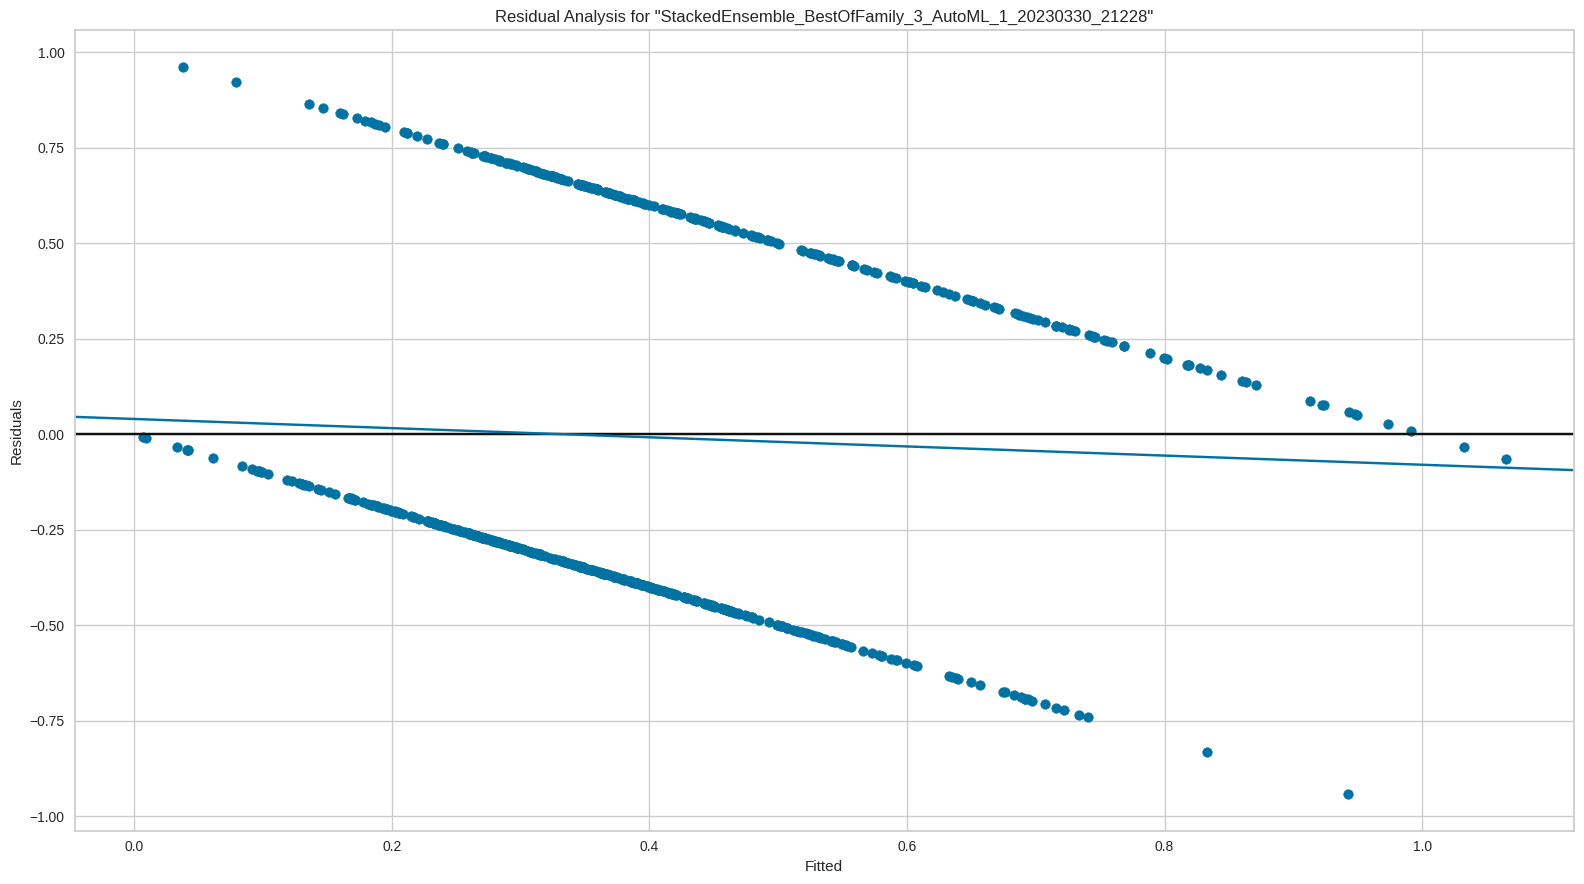

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

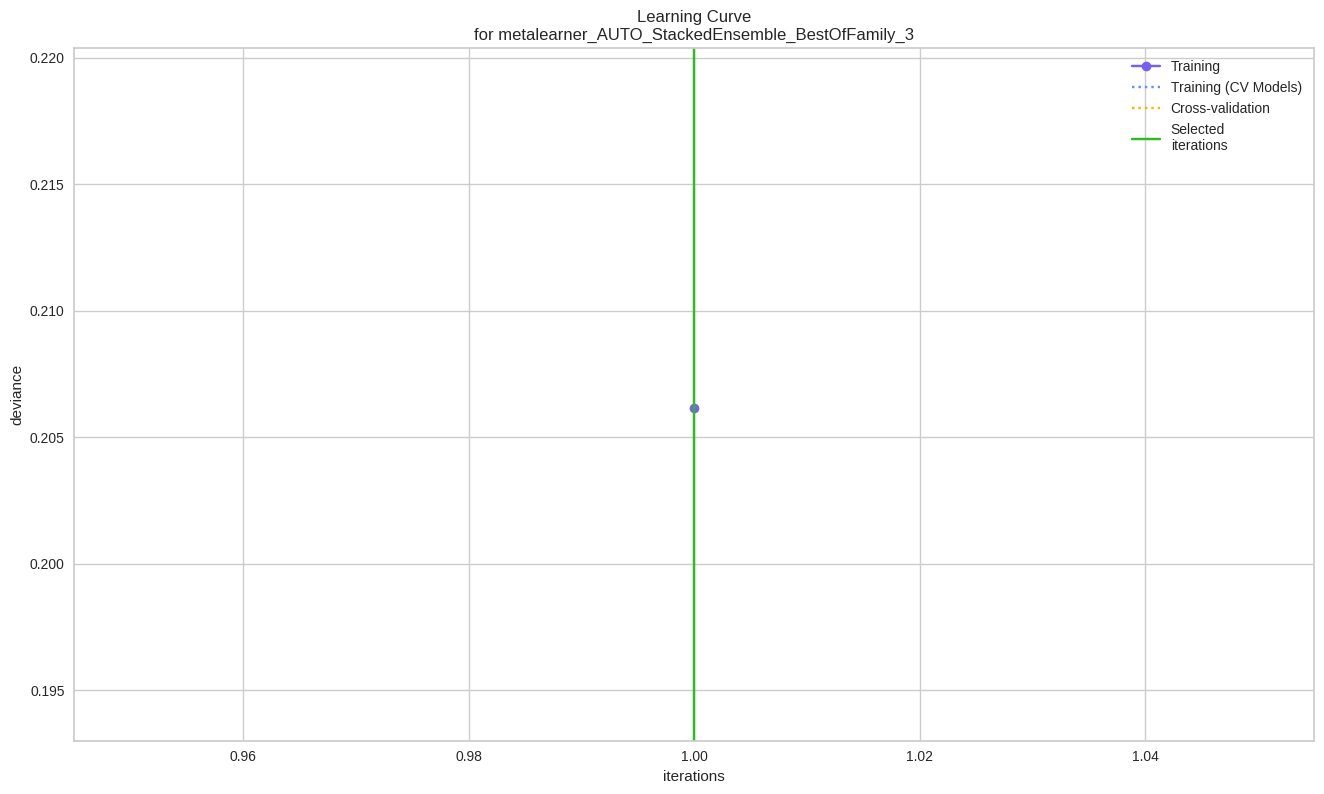

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

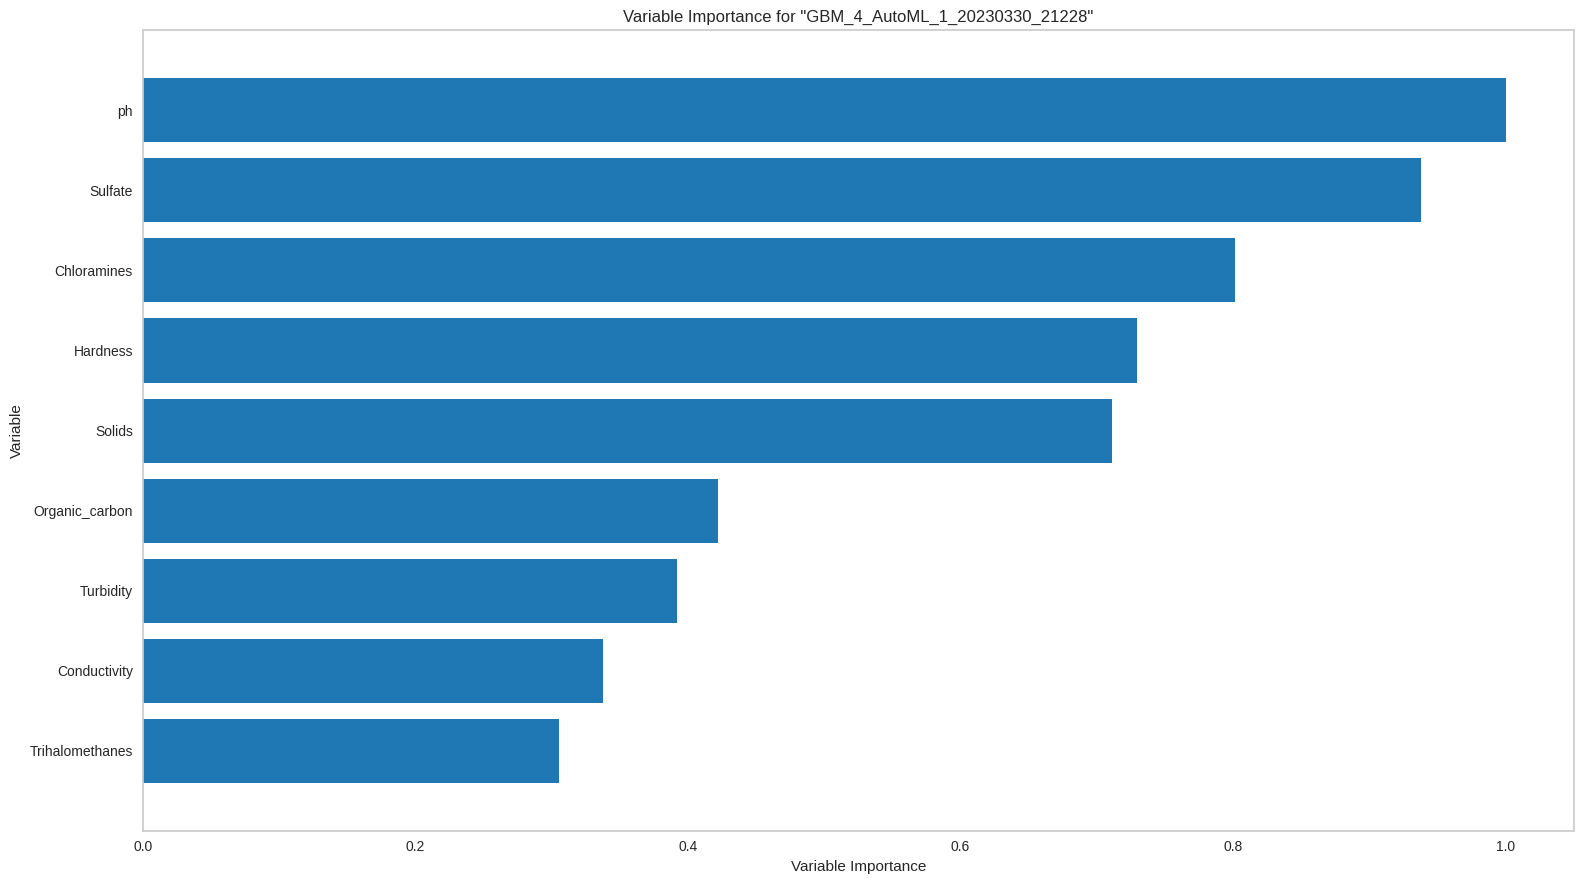

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

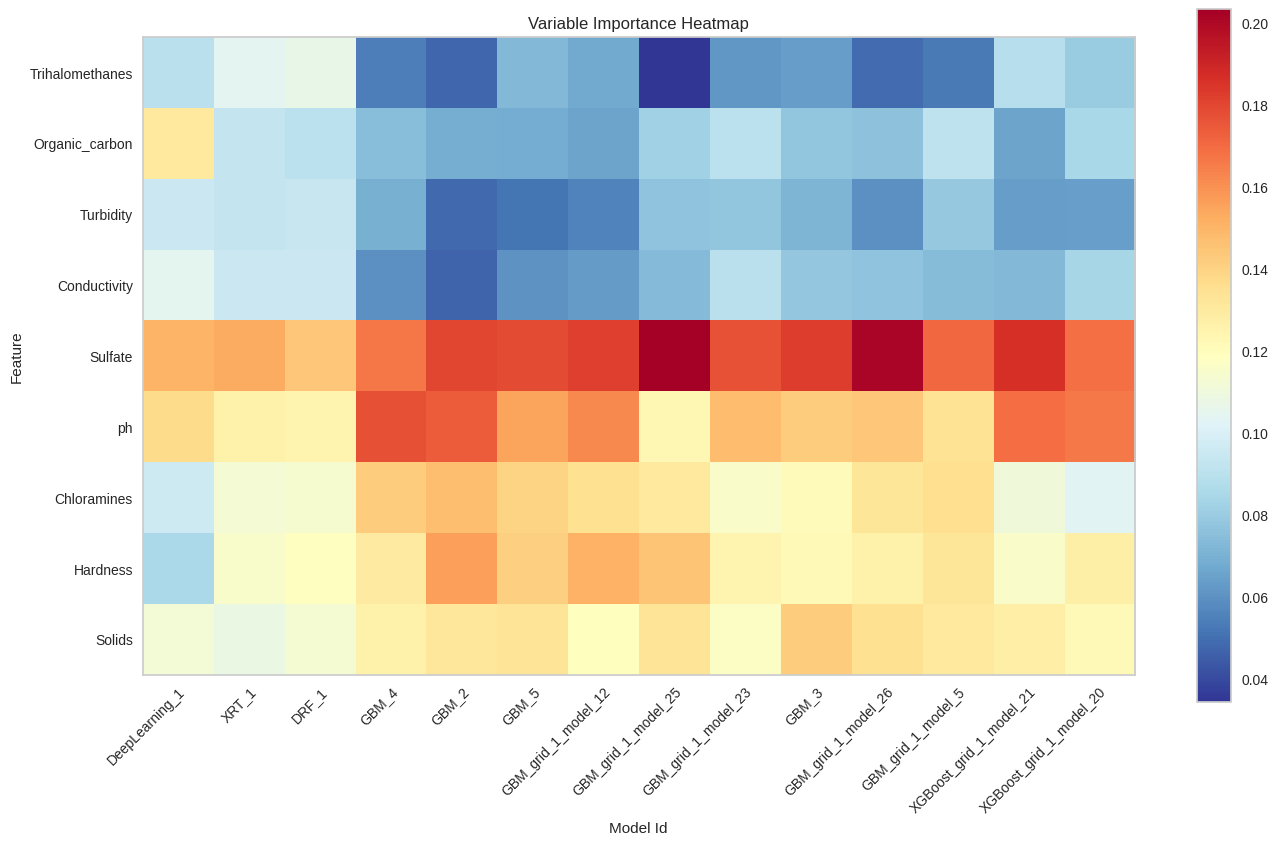

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

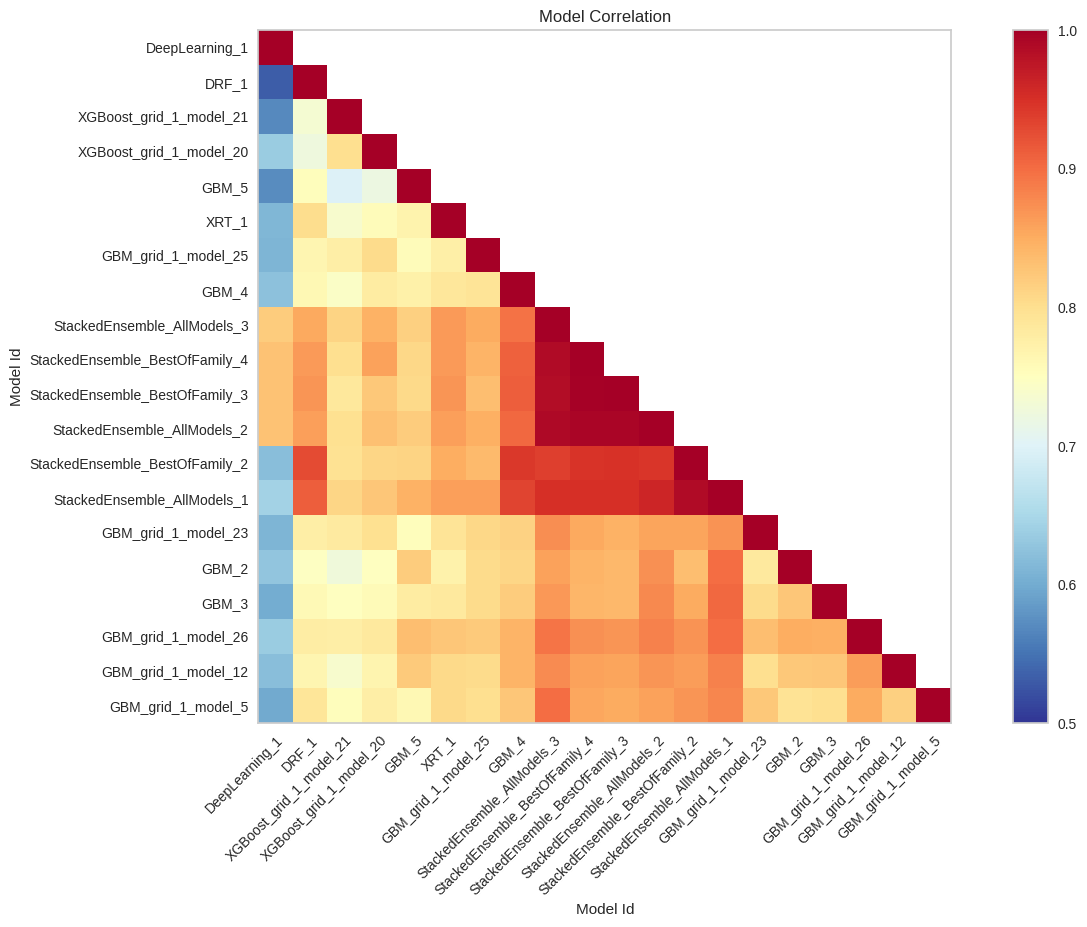

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

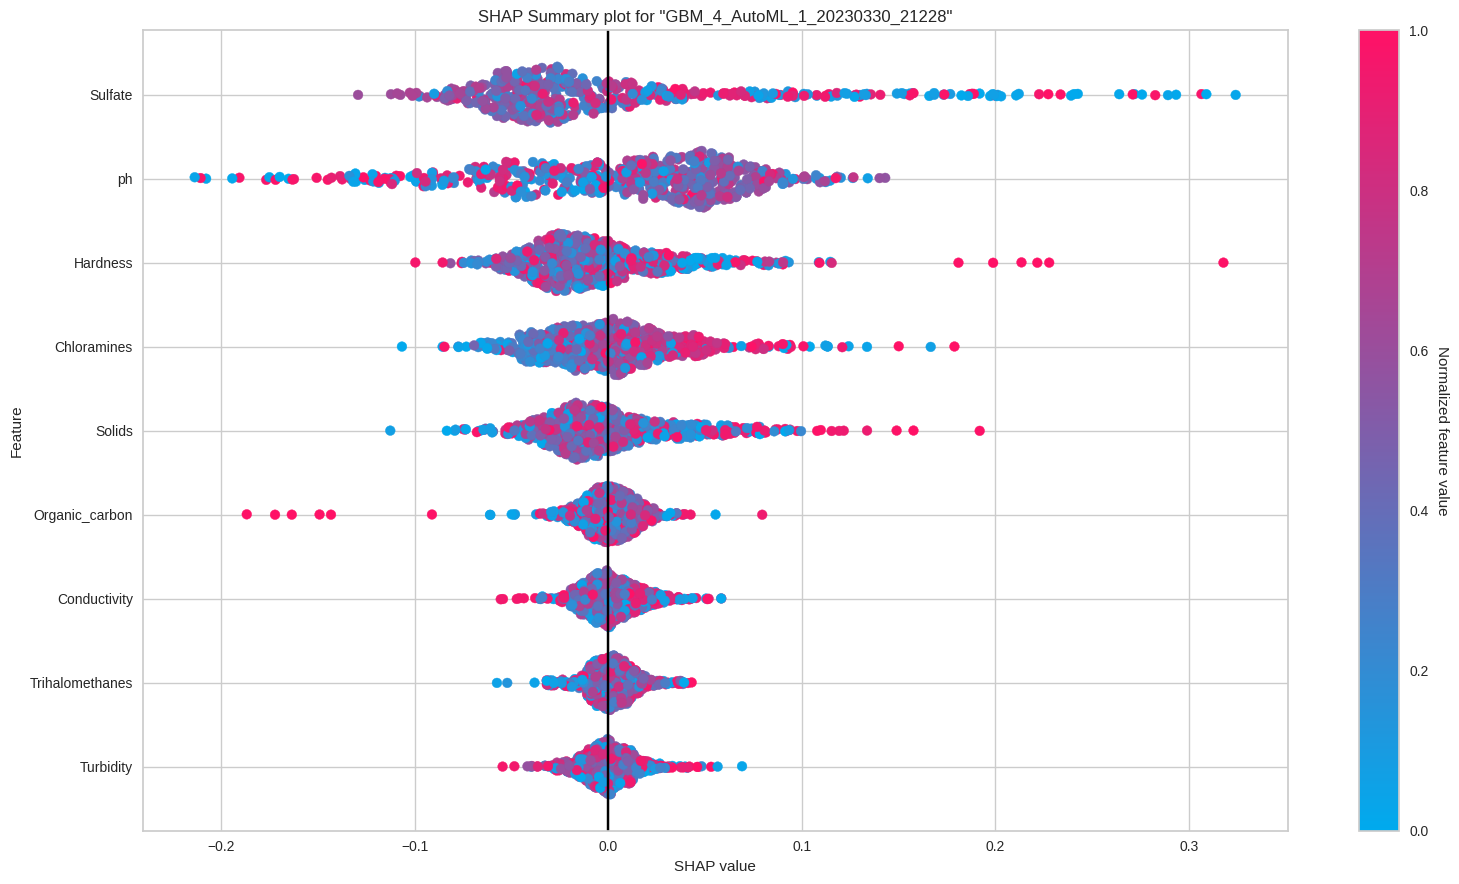

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

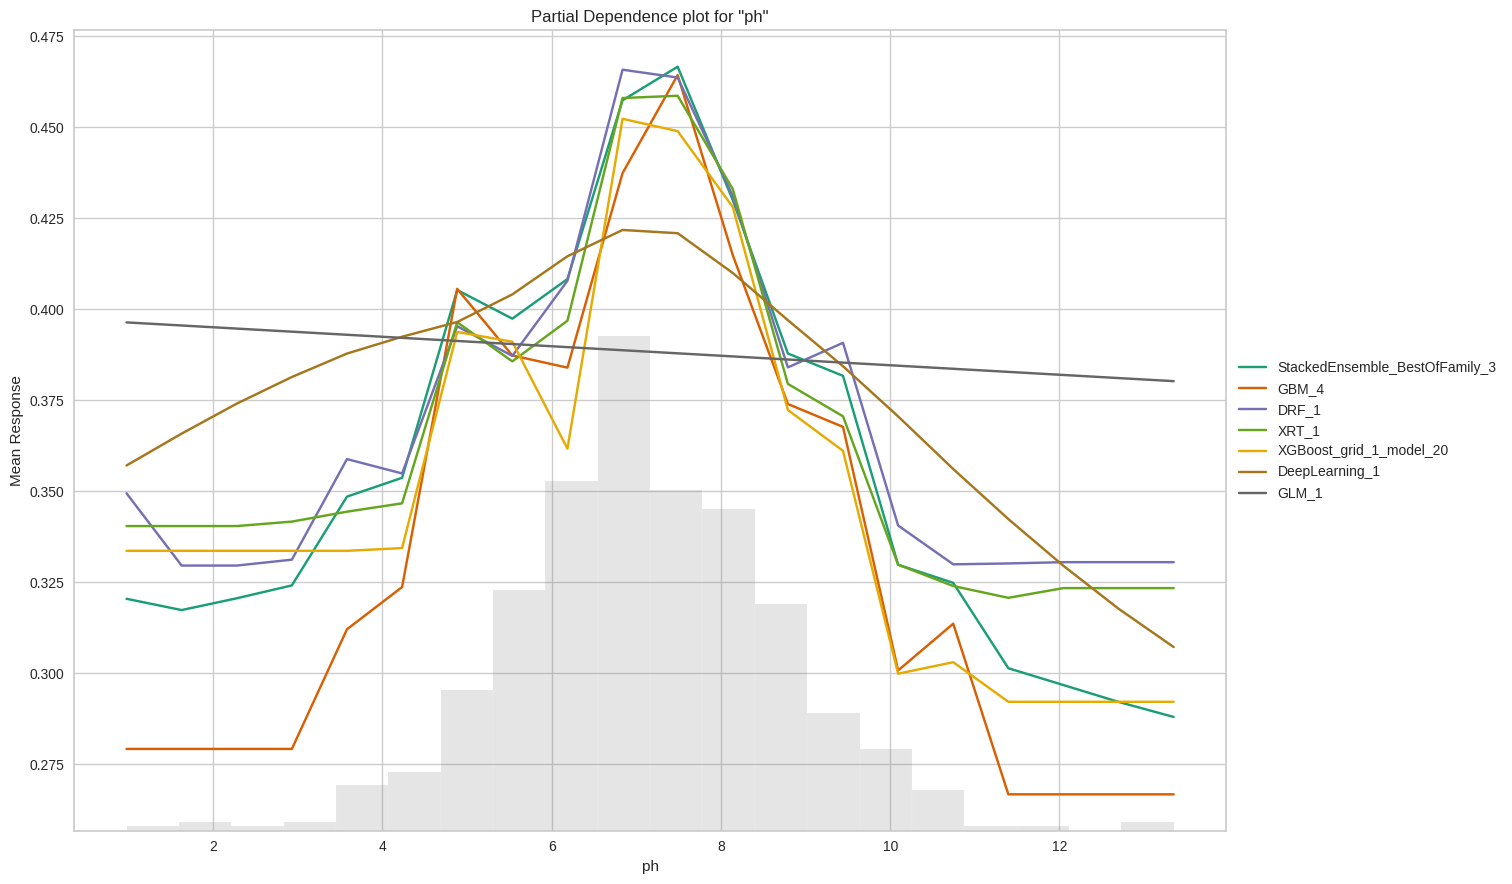

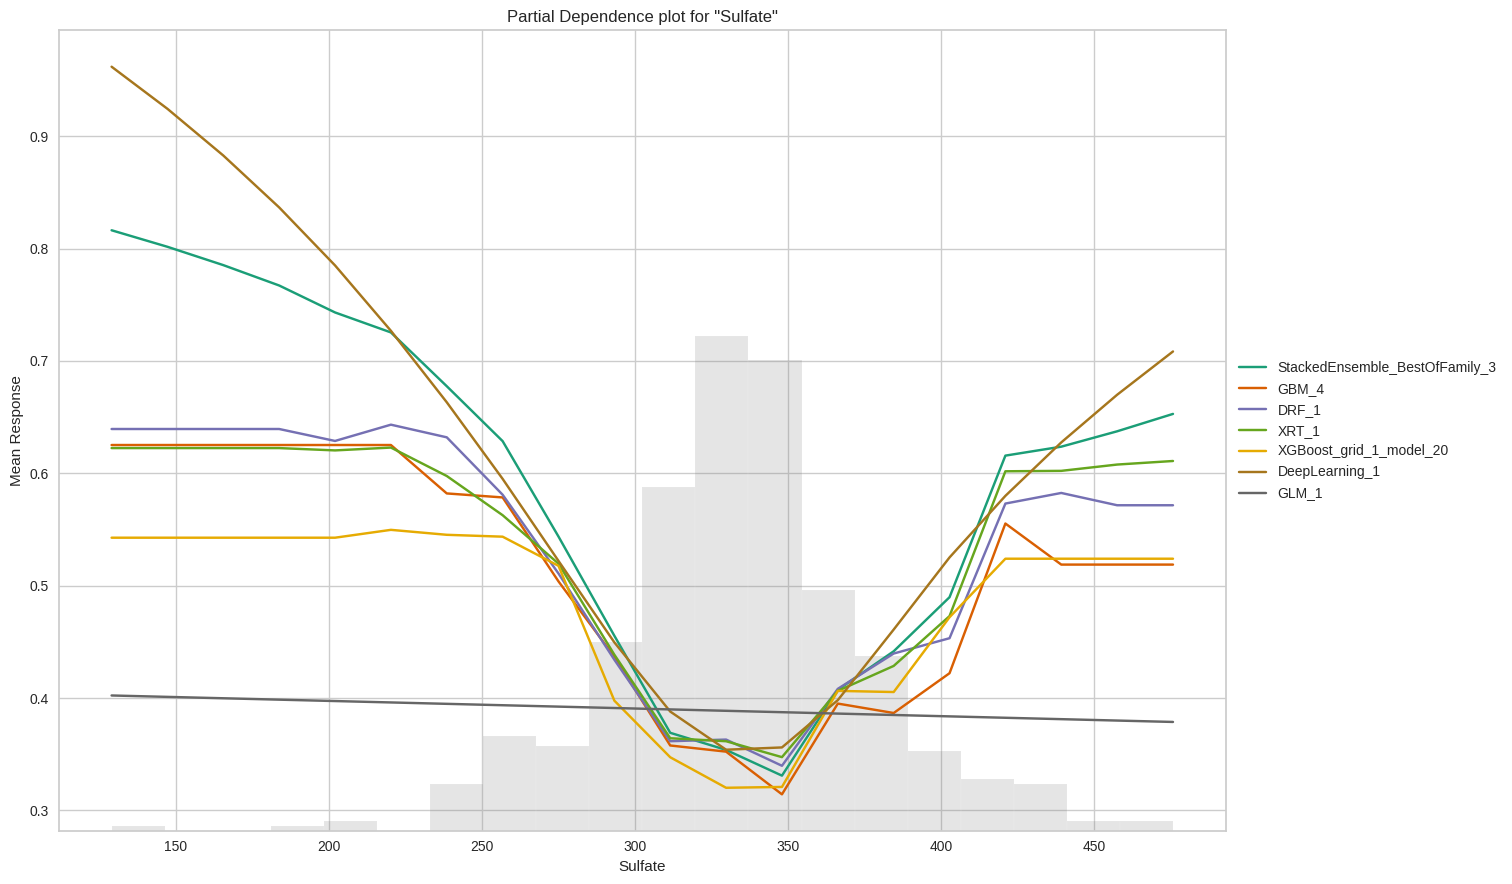

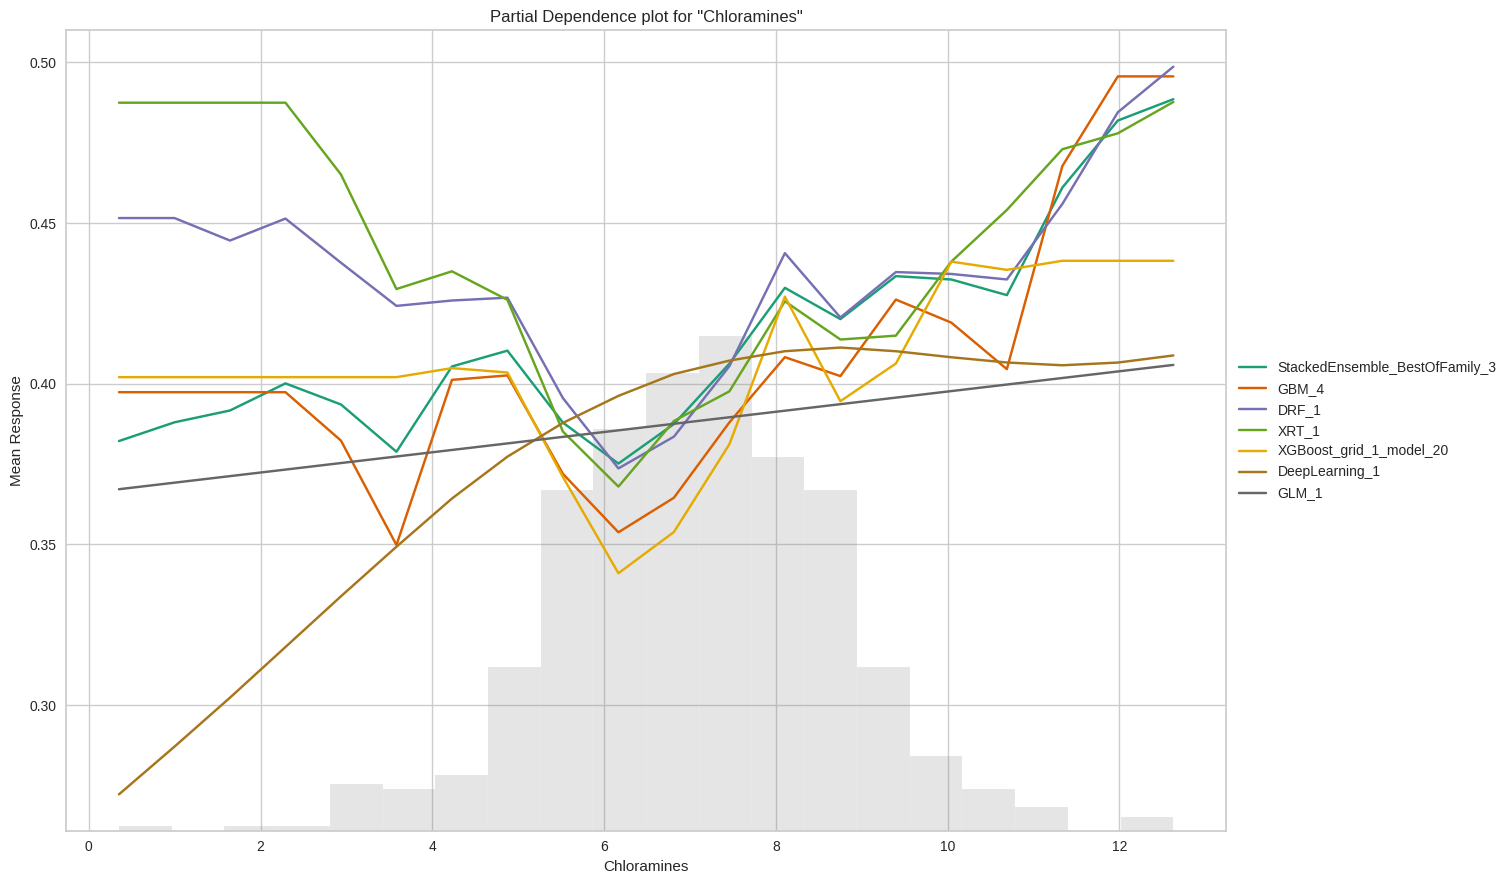

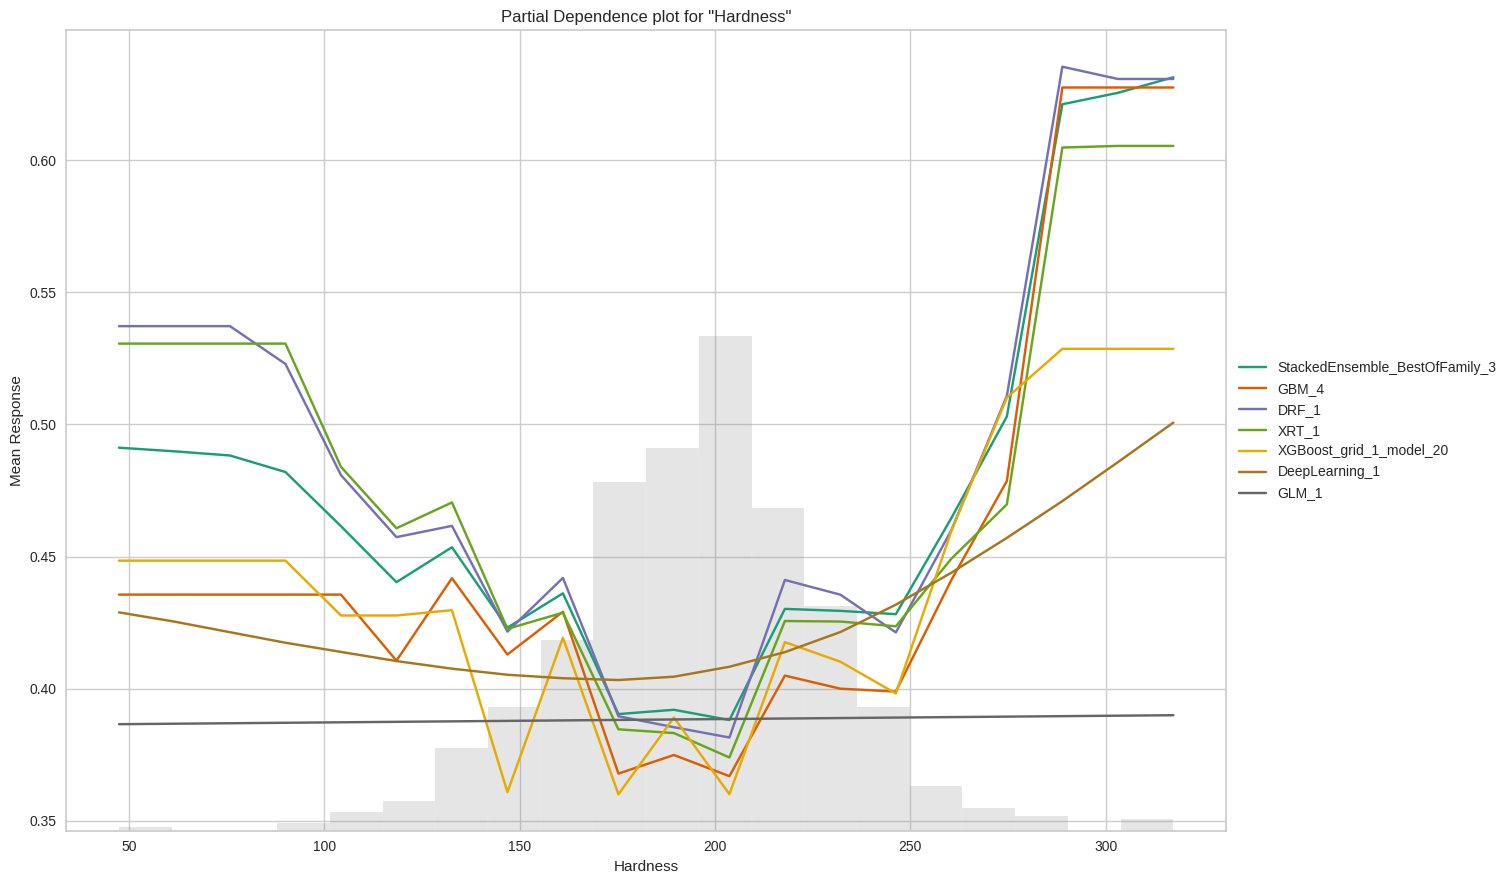

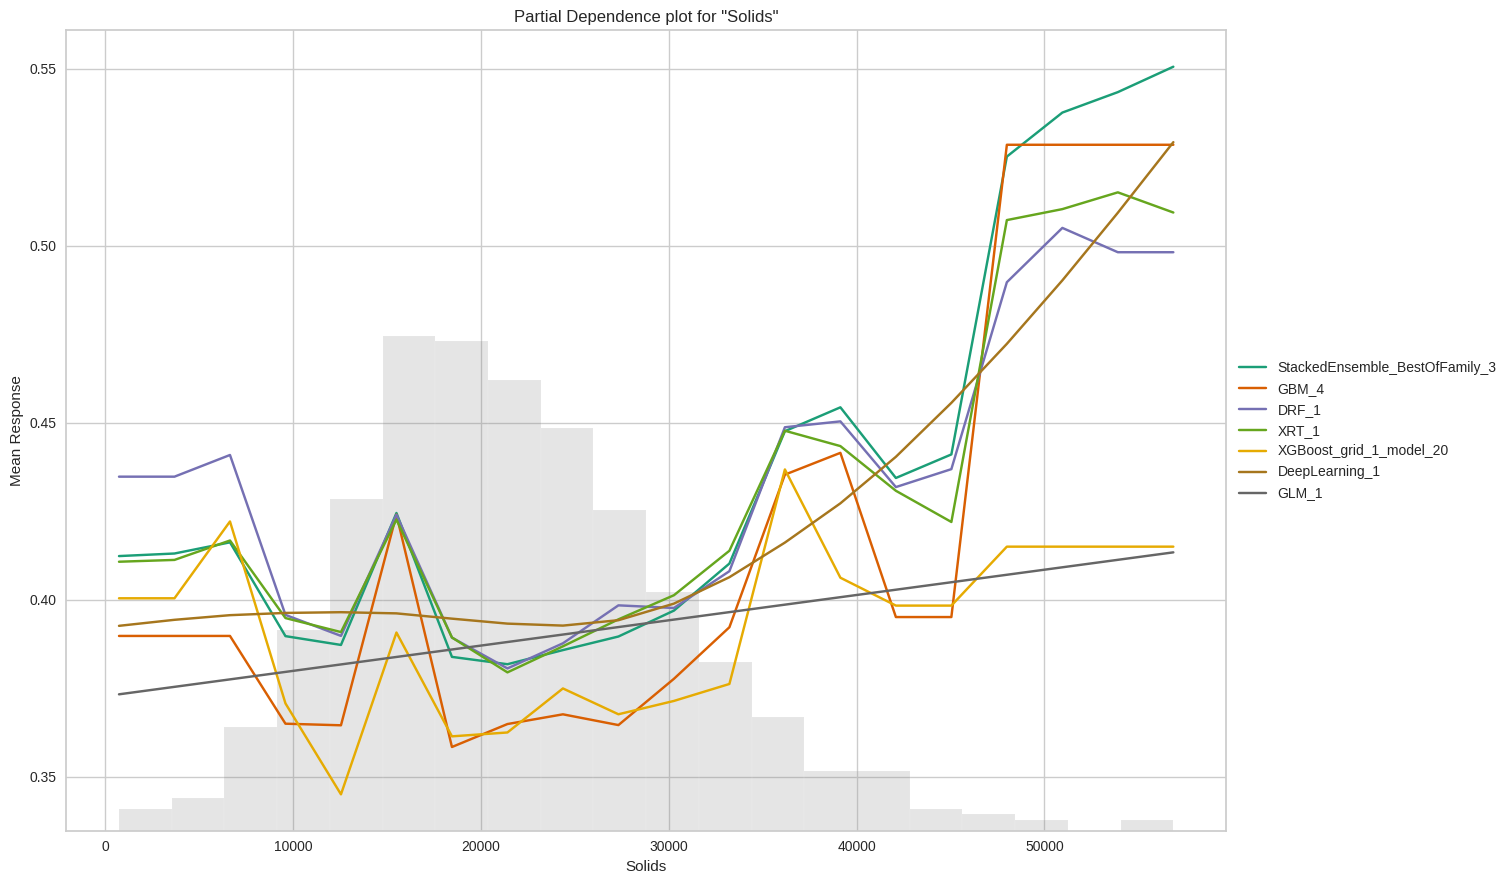

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

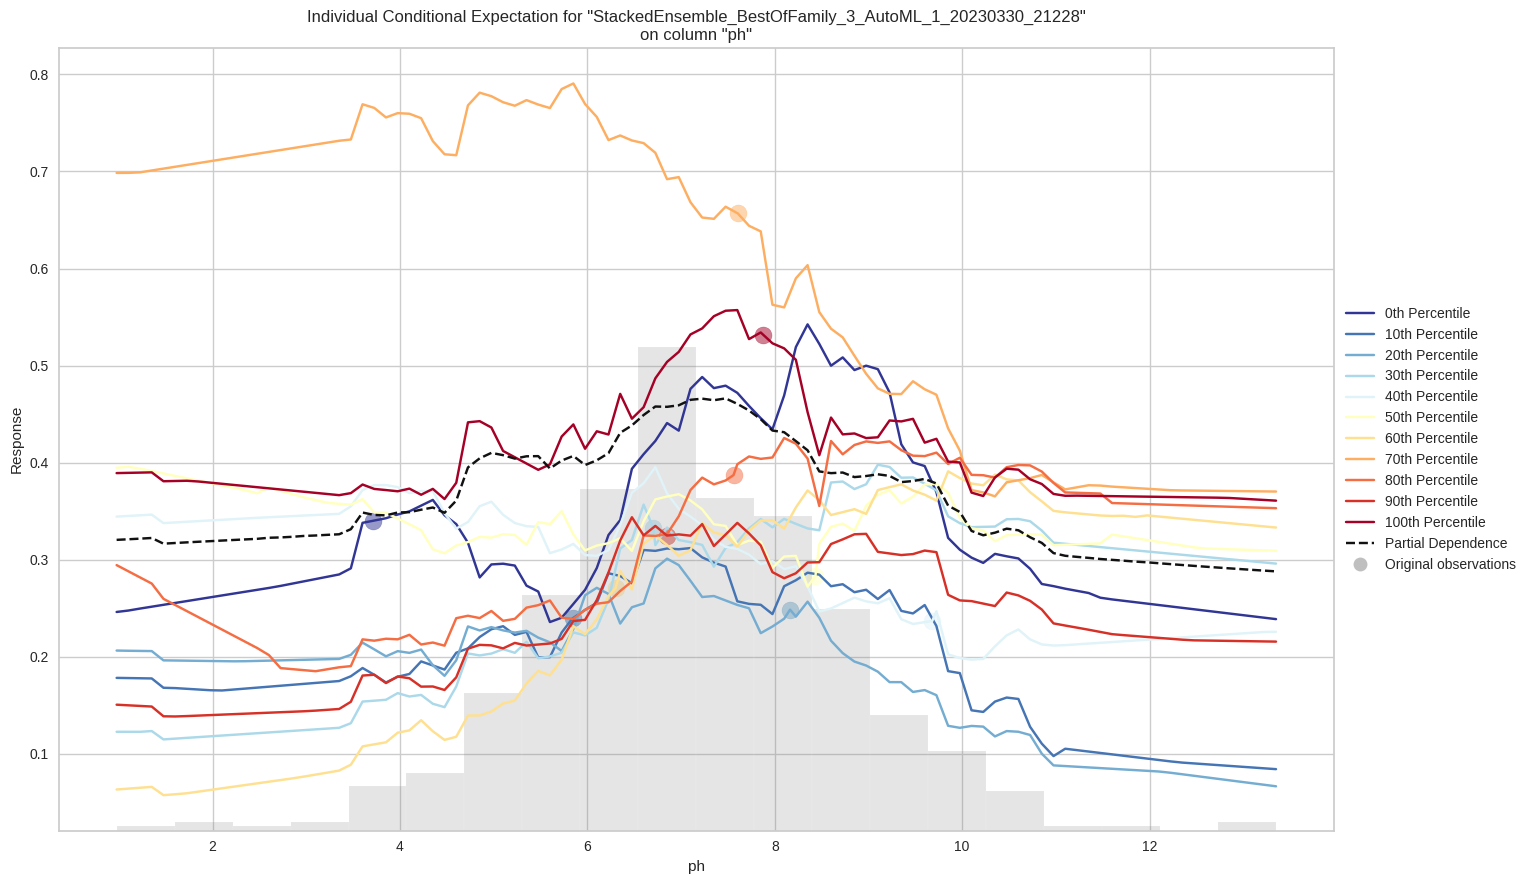

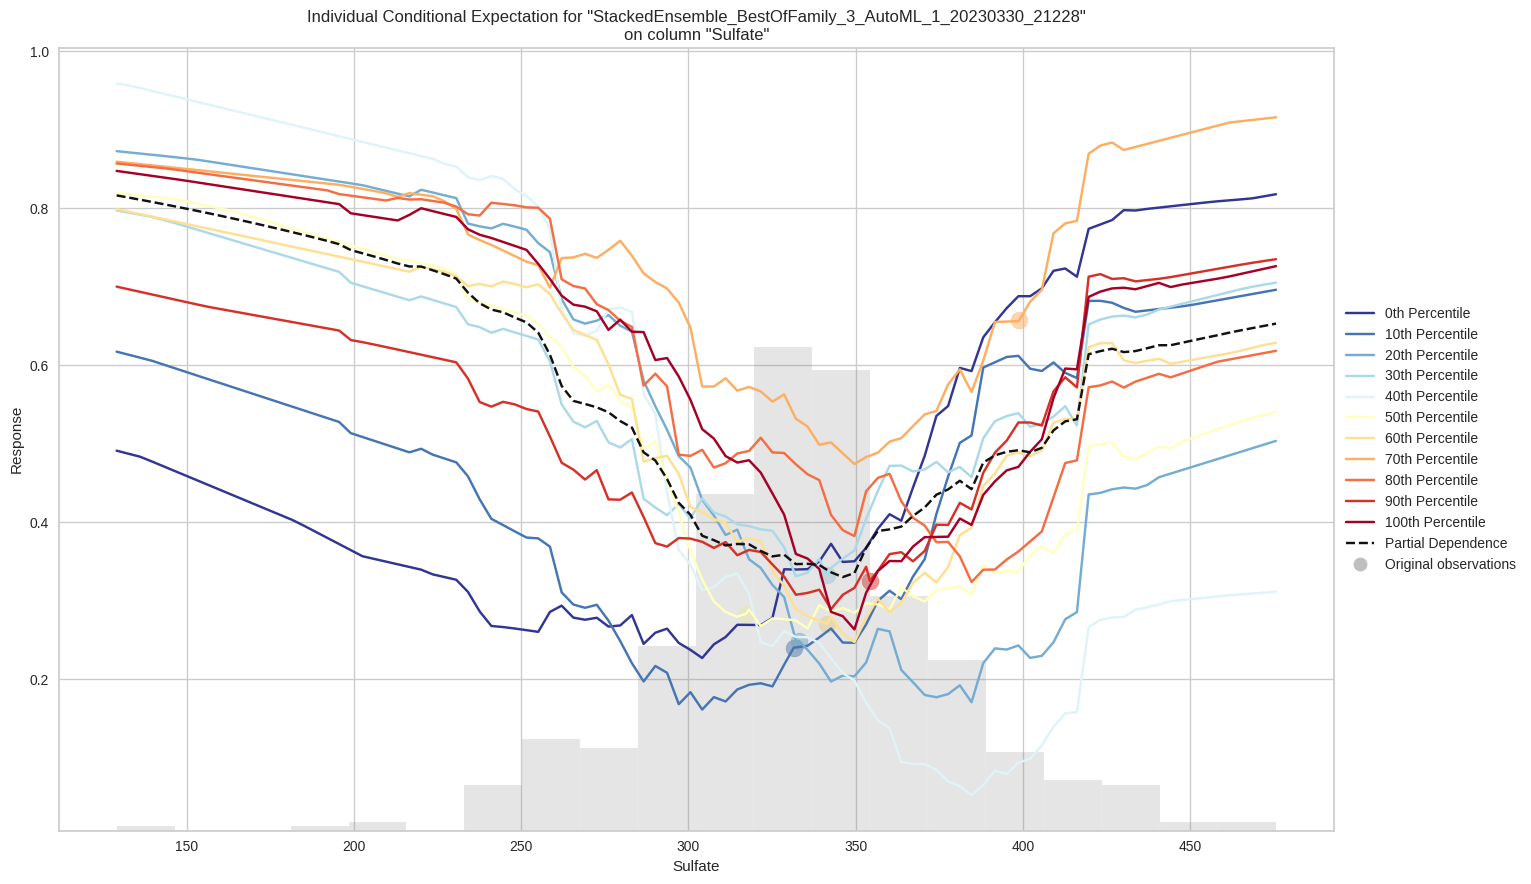

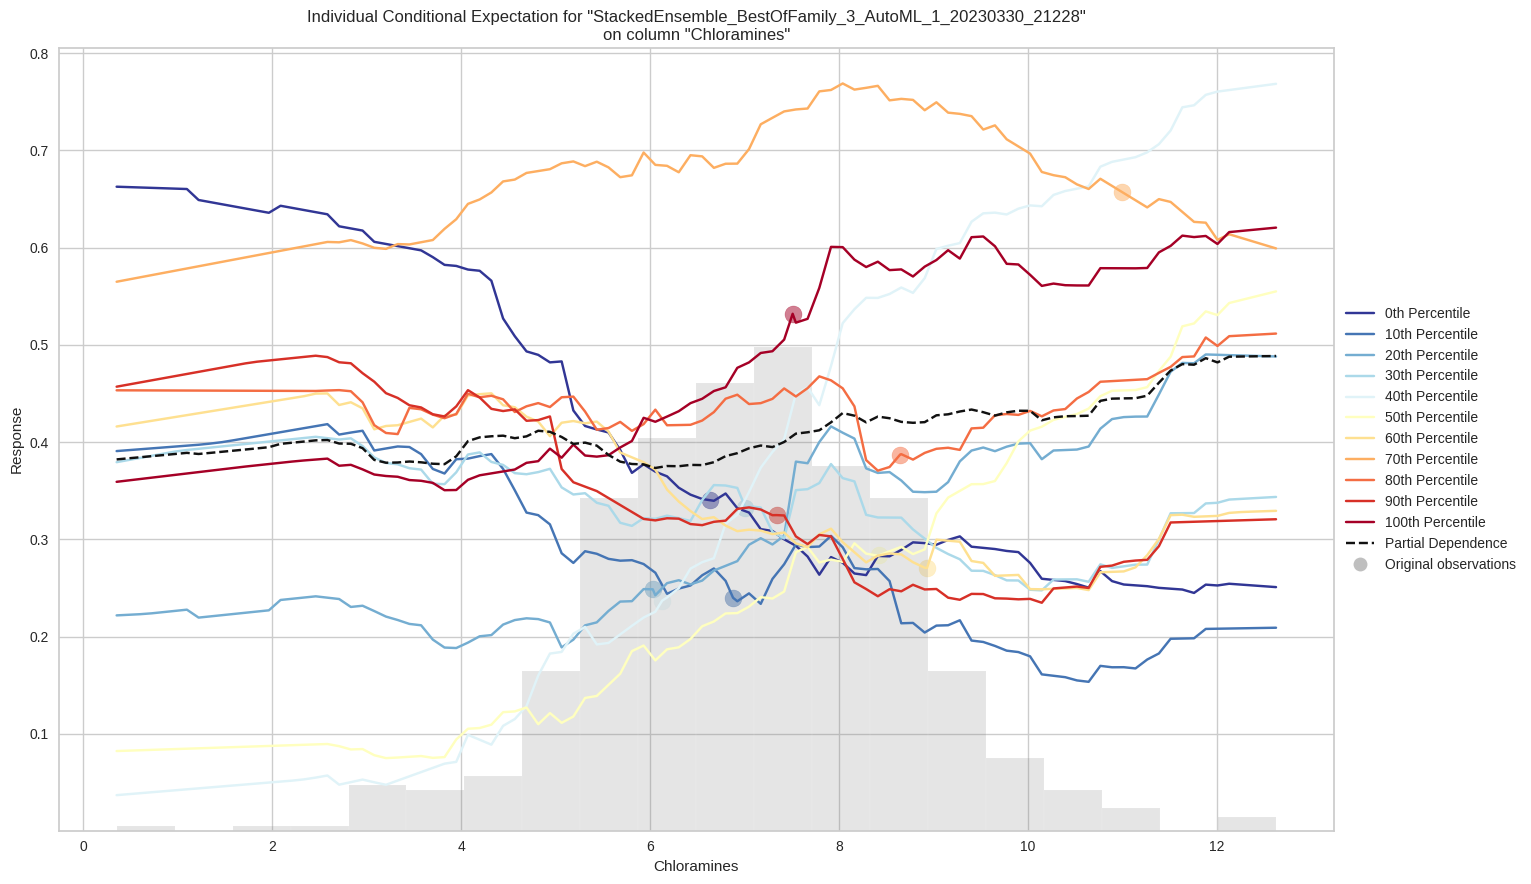

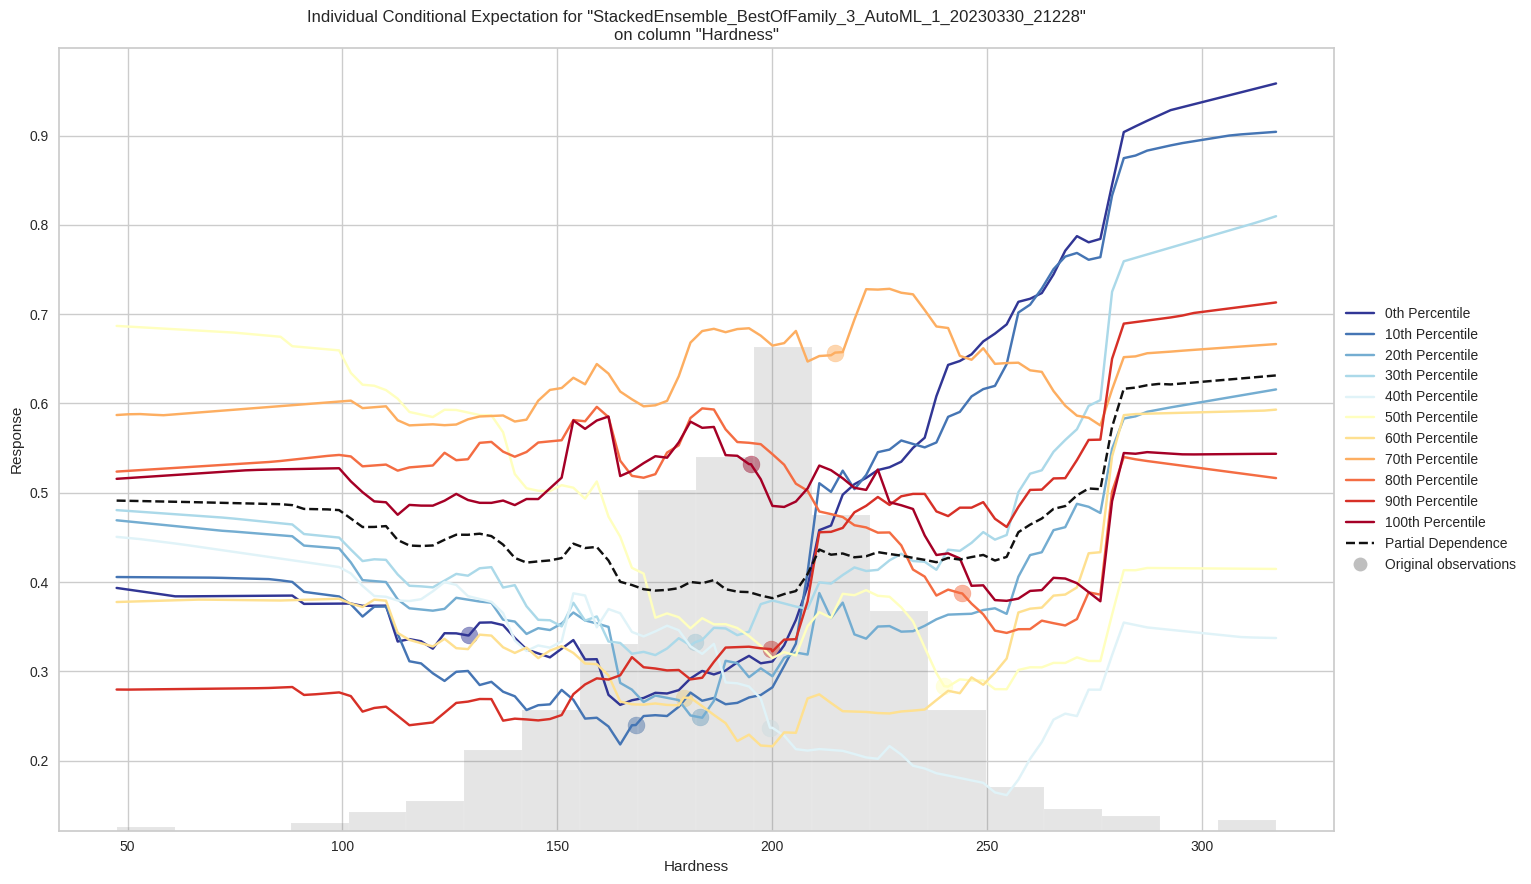

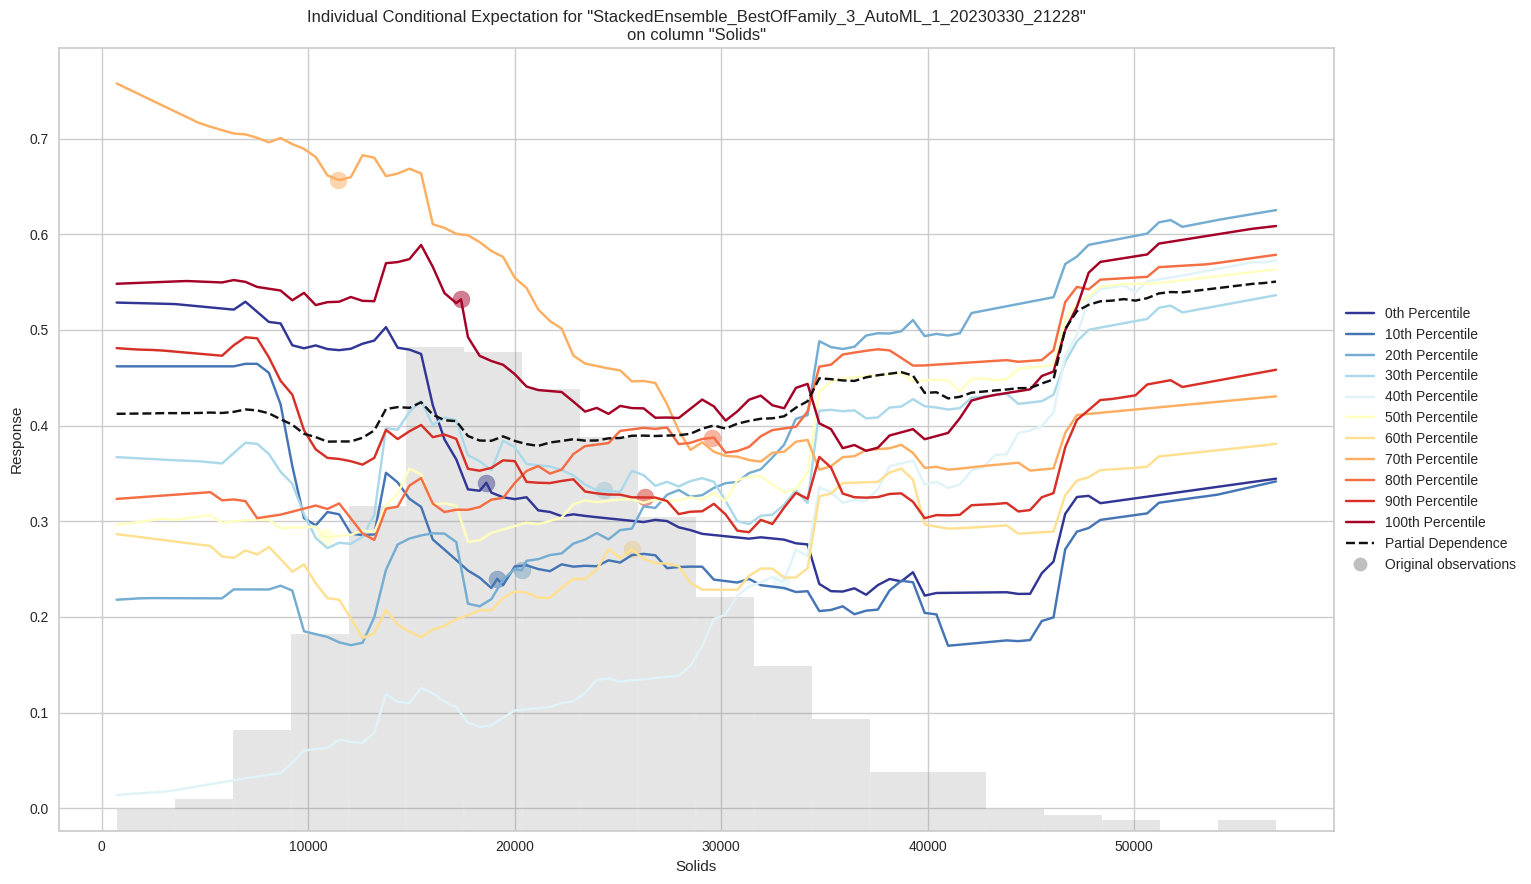

In [64]:
exa = aml.explain(df_test)

# Conclusion

For this dataset the best model according to AutoML is gbm. AutoML is used to find the best model by automatically searching through different algorithms and hyperparameters. This approach is be beneficial in finding an optimal model for water potability prediction.After implementing these model I calculated SHAP values using SHAP analysis method. I plotted different plots like permutation plots, waterfall plot, feature importance bar chart and many more plots.
For each model, the important feature obtained were different. Among all these 3 models .The important features for this model were ph and sulfate This means that for this model the target variable 'Potability' is highly depended on ph and sulfate.

##References:

https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

## MIT License

Copyright (c) 2023 Vaishnavi Narendra Bhoite and AISkunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.